# Postprocess PINN sensitivity analysis

This notebook postprocesses the calculations of the Physics-Informed Neural Network (PINN) for different model weights.

## Preliminaries

Import the necessary libraries and specify the data folders.

In [36]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
FIGURE_PATH = "C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/Code/figures"
DATA_PATH = "C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/Data"
DATASETS_PATH = DATA_PATH + "/processed_data/"
MODEL_RESULTS_PATH = DATA_PATH + "/model_results/manuscript/sensitivity/"

In [39]:
with open("functions_plot_calculations.py", 'r') as file:
    content = file.read()

# Execute the content of the .py file
exec(content)

In [40]:
path_to_shapefile ="C:/Users/vitas/Desktop/LE PINN/pinn.global.dust/pinn.global.dust/ne_110m_admin_0_countries.shp"
world = gpd.read_file(path_to_shapefile)


## Load the datasets

Load the empirical datasets.

In [41]:

df_empirical_Holocene = pd.read_csv(DATASETS_PATH + "df_empirical_Holocene.csv")
df_empirical_LGM = pd.read_csv(DATASETS_PATH + "df_empirical_LGM.csv")

## Visualization of model results

Load the PINN calculations for the different model weights and visualize them with the original dataset. Perform also a log-normal fit of the PINN results.

In [42]:
df_weights = pd.read_csv(MODEL_RESULTS_PATH + "weights_sensitivity.csv")

df_weights['label'] = df_weights['weights'].apply(lambda x: str(x))
for i, label in enumerate(df_weights['label']):
    if label[-2:] == ".0":
        df_weights.at[i, 'label'] = label[:-2]

dfs_pinn_results_Holocene = []
dfs_pinn_results_LGM = []

for i in df_weights.index:
    dfs_pinn_results_Holocene.append(pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_empirical_Holocene_sensitivity_"+str(i)+".csv"))
    dfs_pinn_results_LGM.append(pd.read_csv(MODEL_RESULTS_PATH + "df_pinn_empirical_LGM_sensitivity_"+str(i)+".csv"))

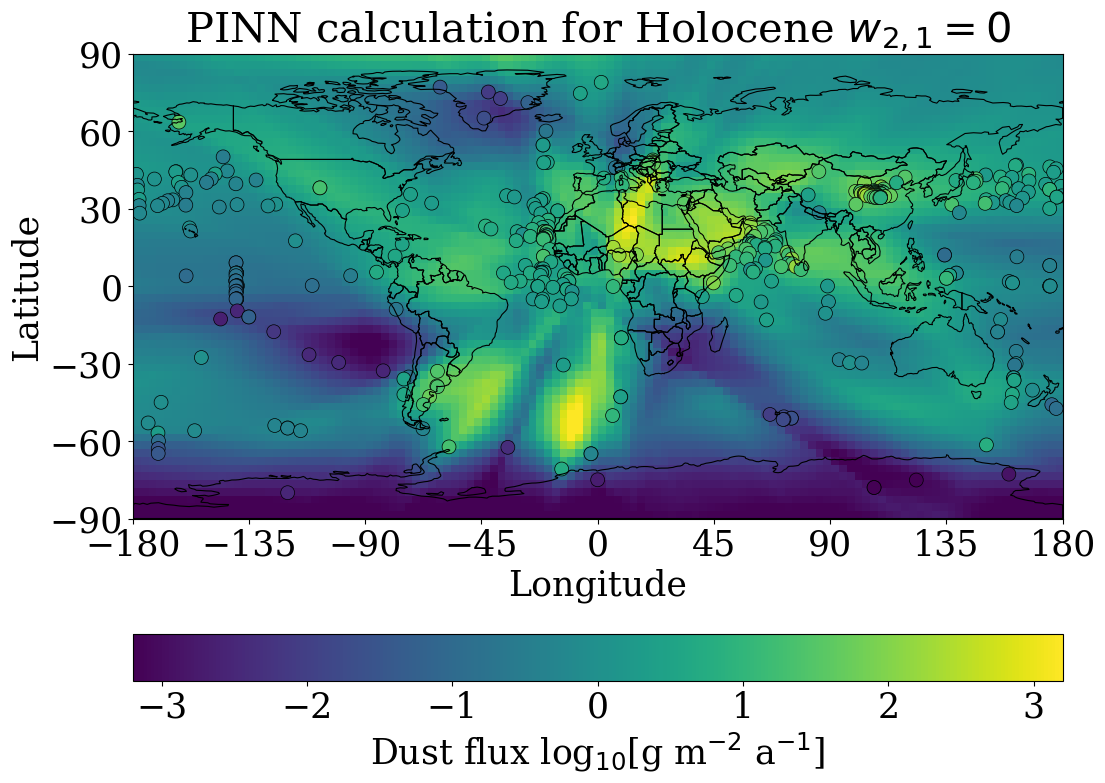

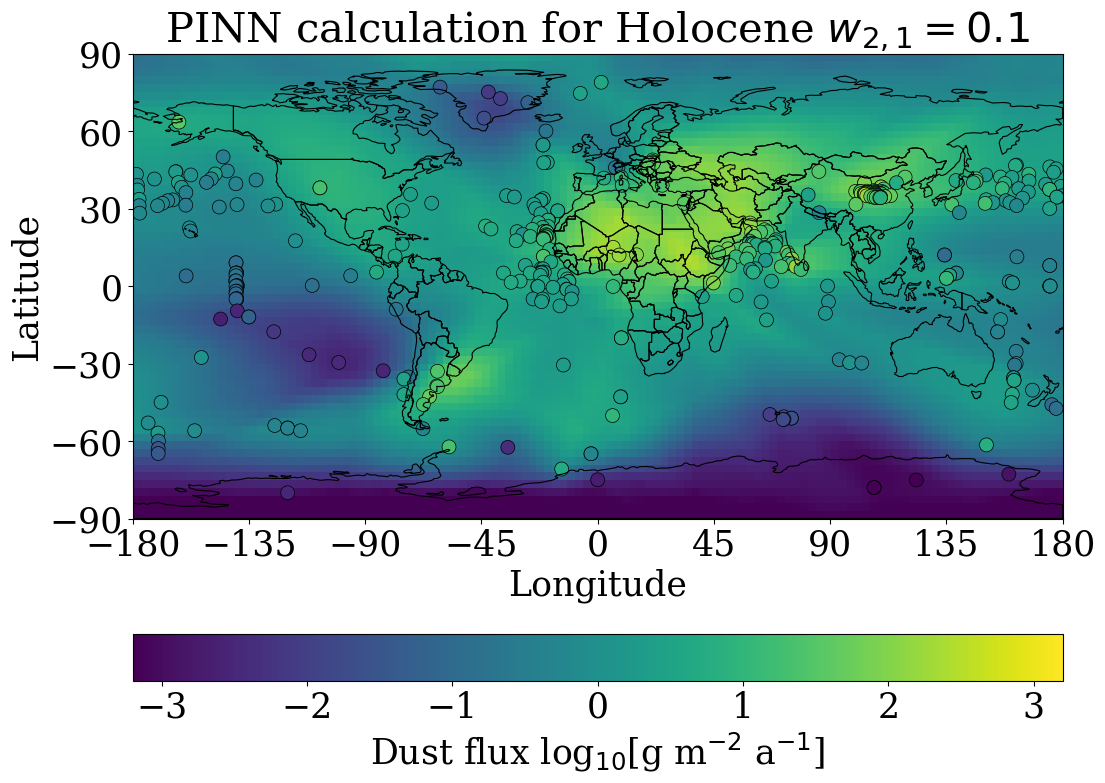

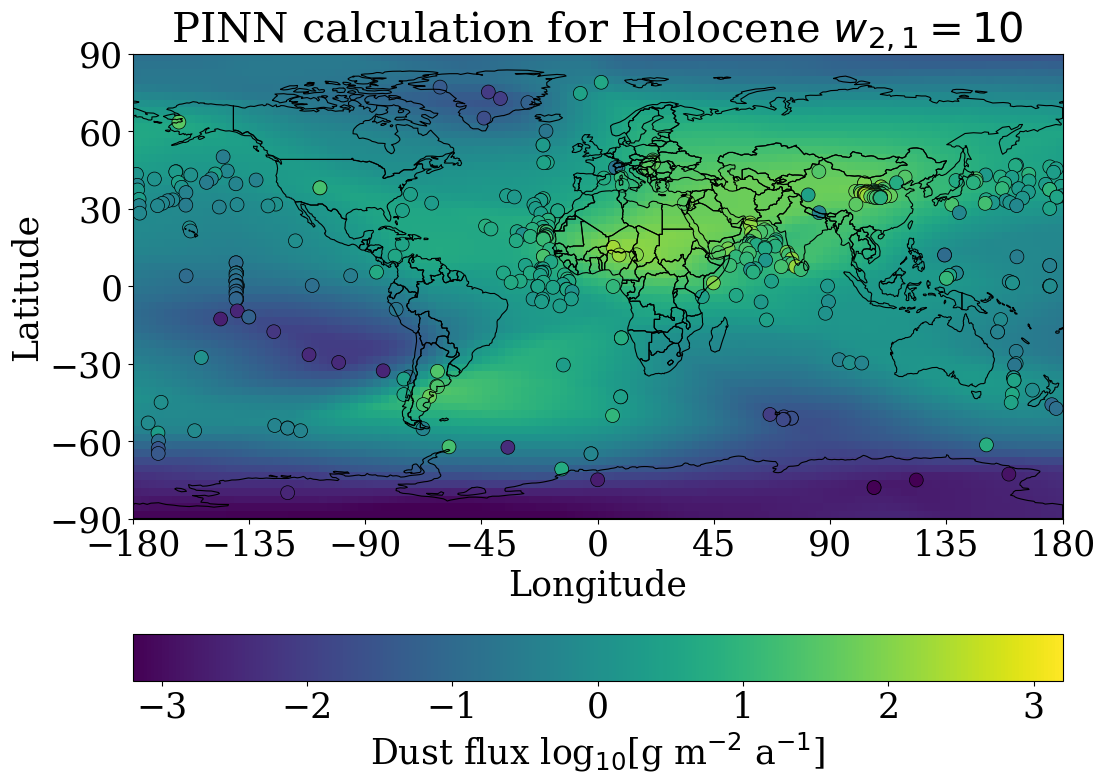

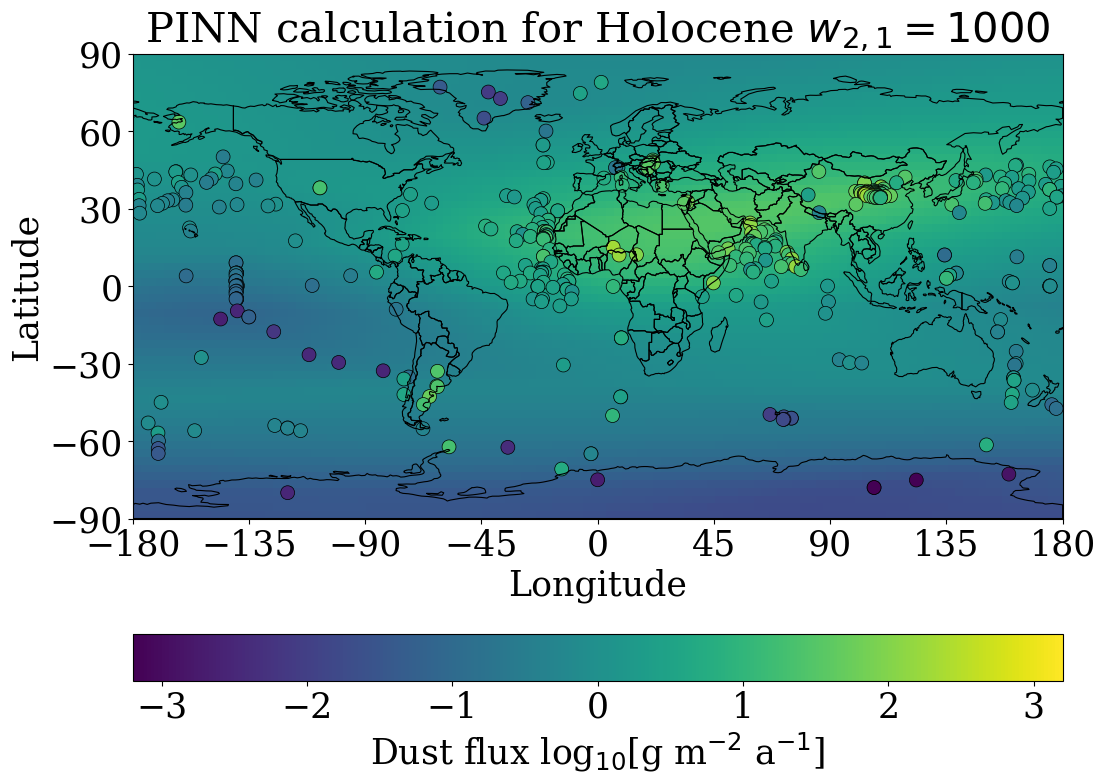

In [43]:
for i, results in enumerate(dfs_pinn_results_Holocene):
    weight = df_weights['label'][i]
    plot_dust_deposition_map(
        results,
        df_empirical_Holocene,
        title=f'PINN calculation for Holocene $w_{{2,1}} = {weight}$',
        name_to_save="PINN_SENSITIVITY_MAP_HOLOCENE_"+str(i),
        figure_save_path=FIGURE_PATH,
        label_str='log_dep',
    )

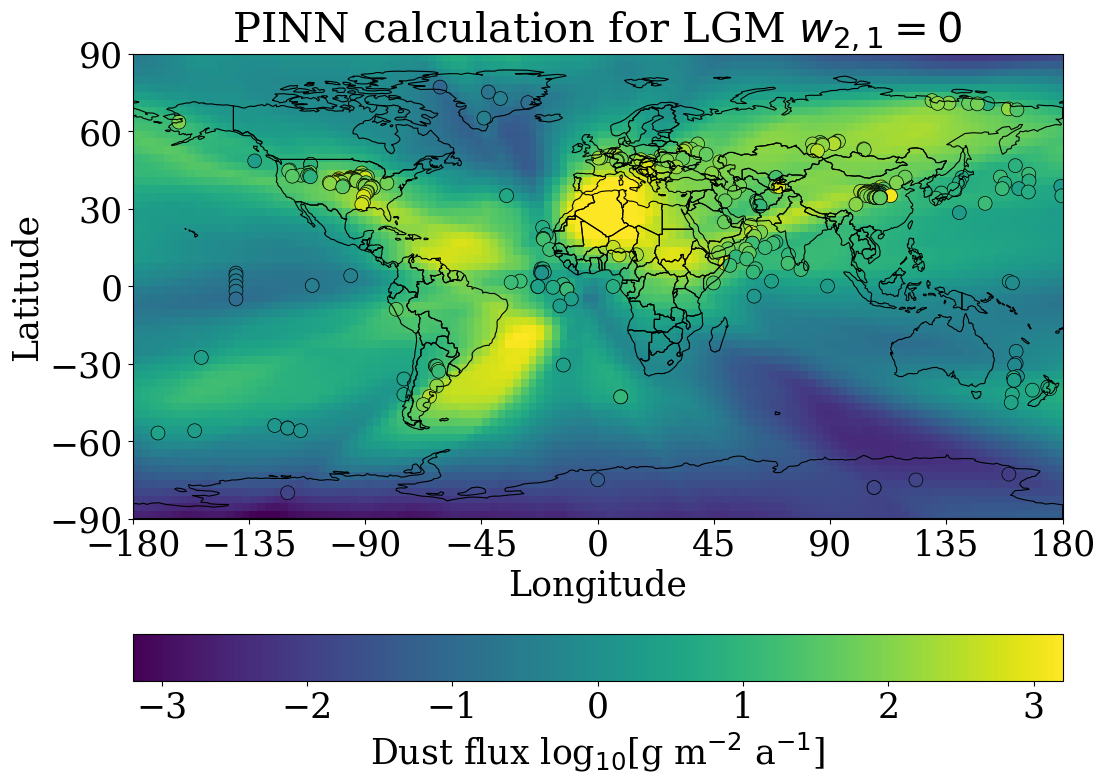

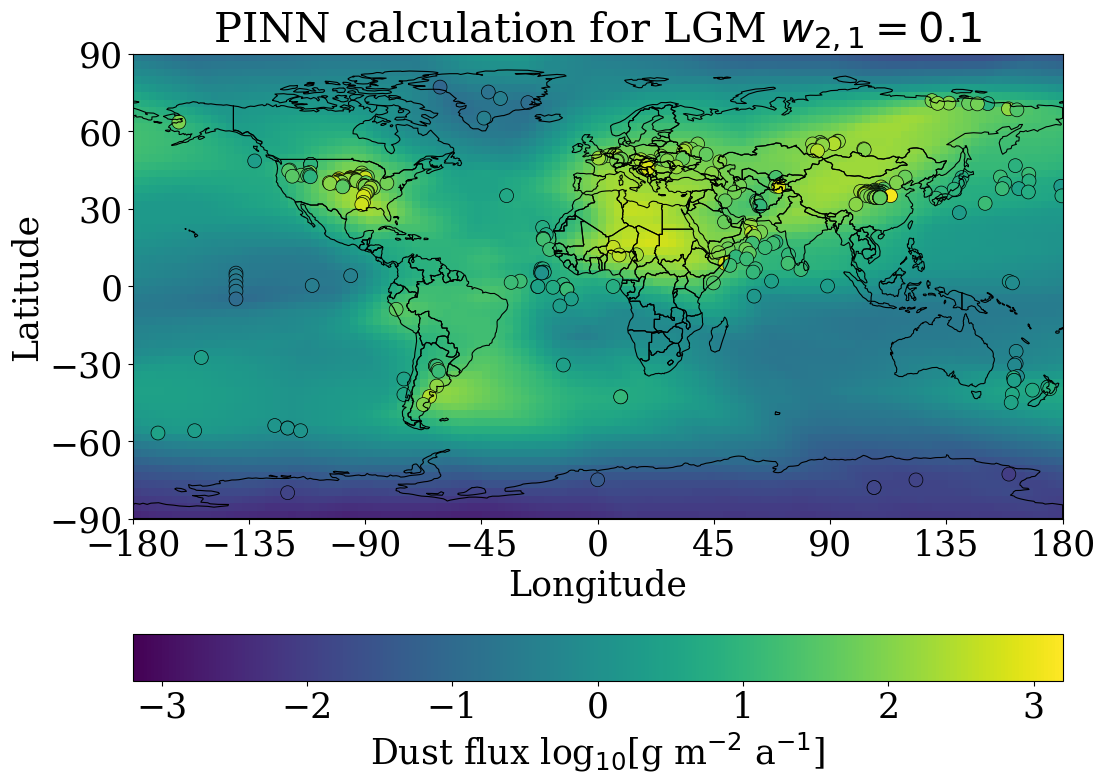

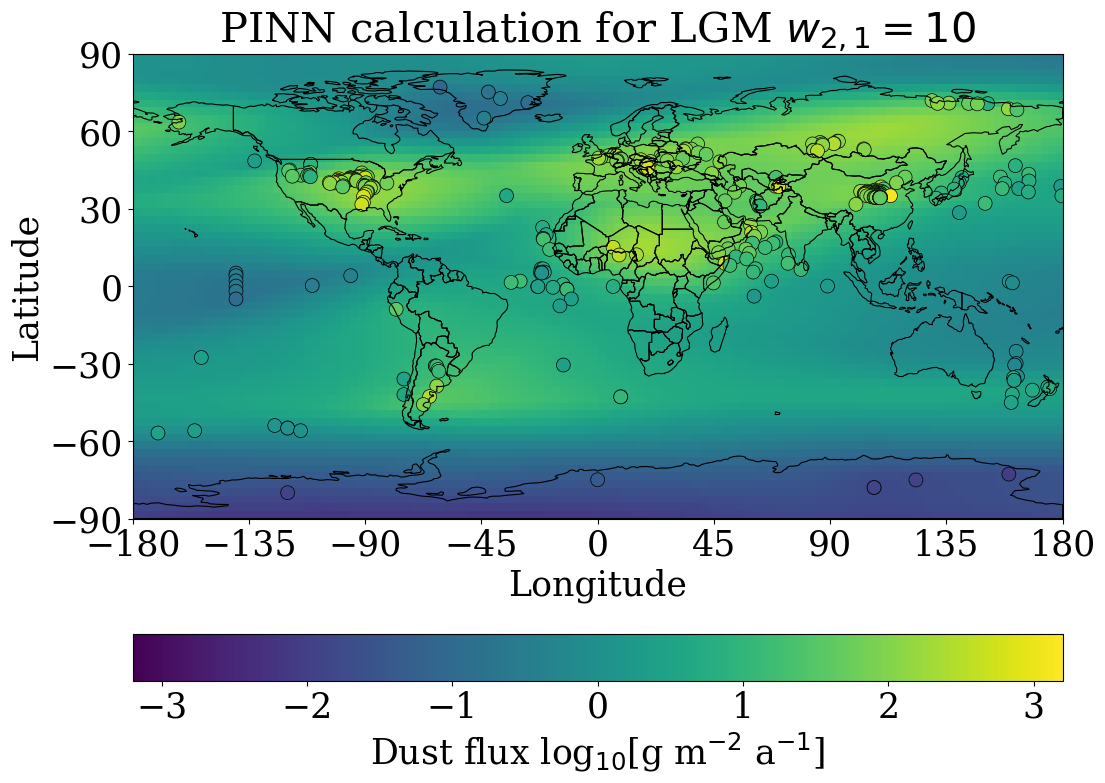

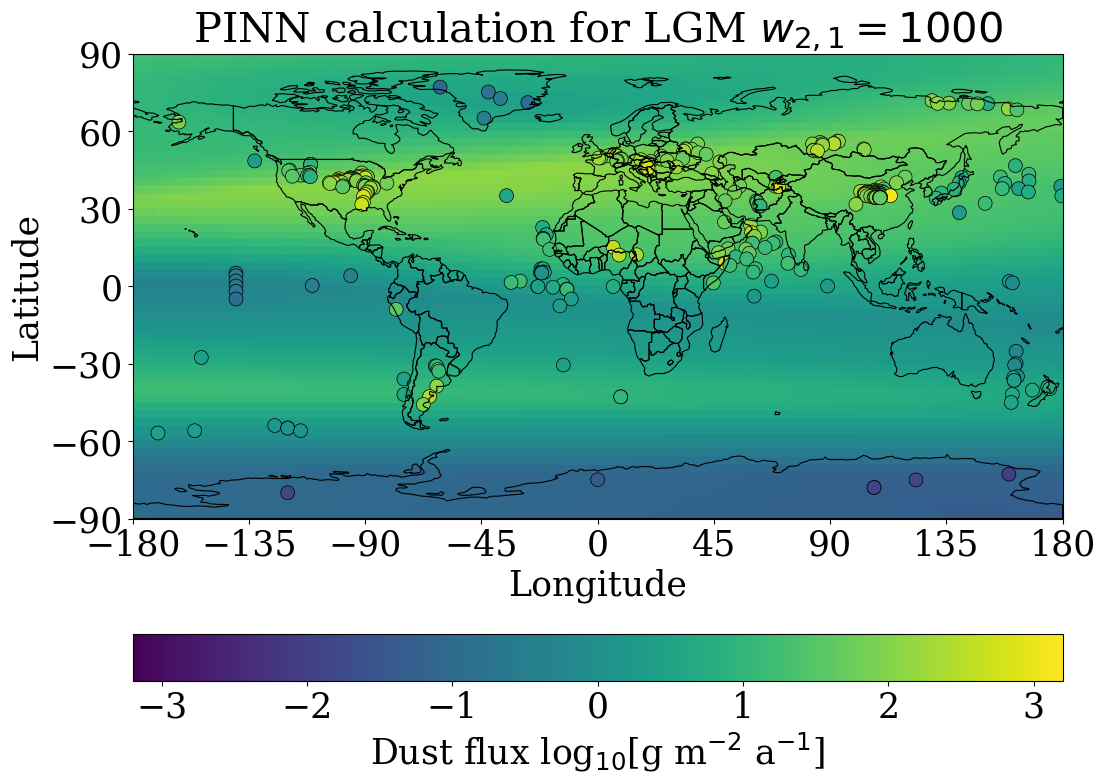

In [44]:
for i, results in enumerate(dfs_pinn_results_LGM):
    weight = df_weights['label'][i]
    plot_dust_deposition_map(
        results,
        df_empirical_LGM,
        title=f'PINN calculation for LGM $w_{{2,1}} = {weight}$',
        name_to_save="PINN_SENSITIVITY_MAP_LGM_"+str(i),
        figure_save_path=FIGURE_PATH,
        label_str='log_dep',
    )

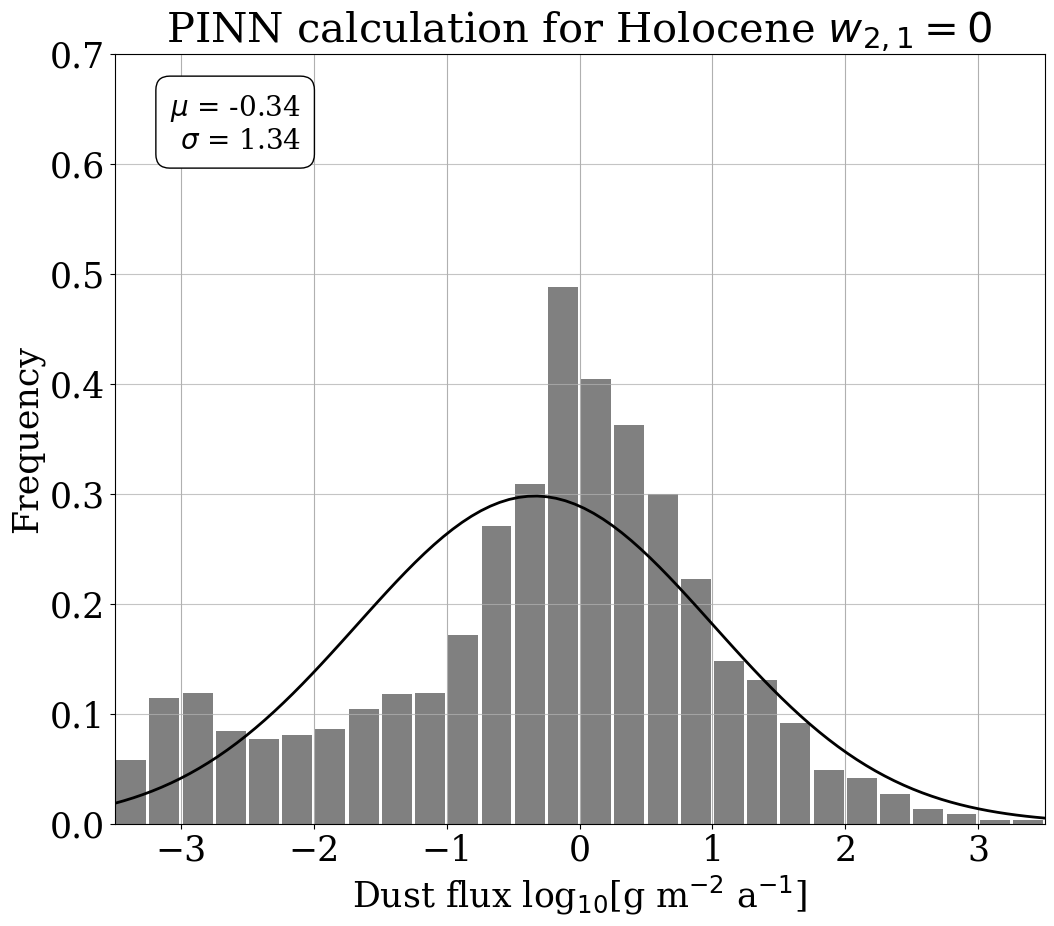

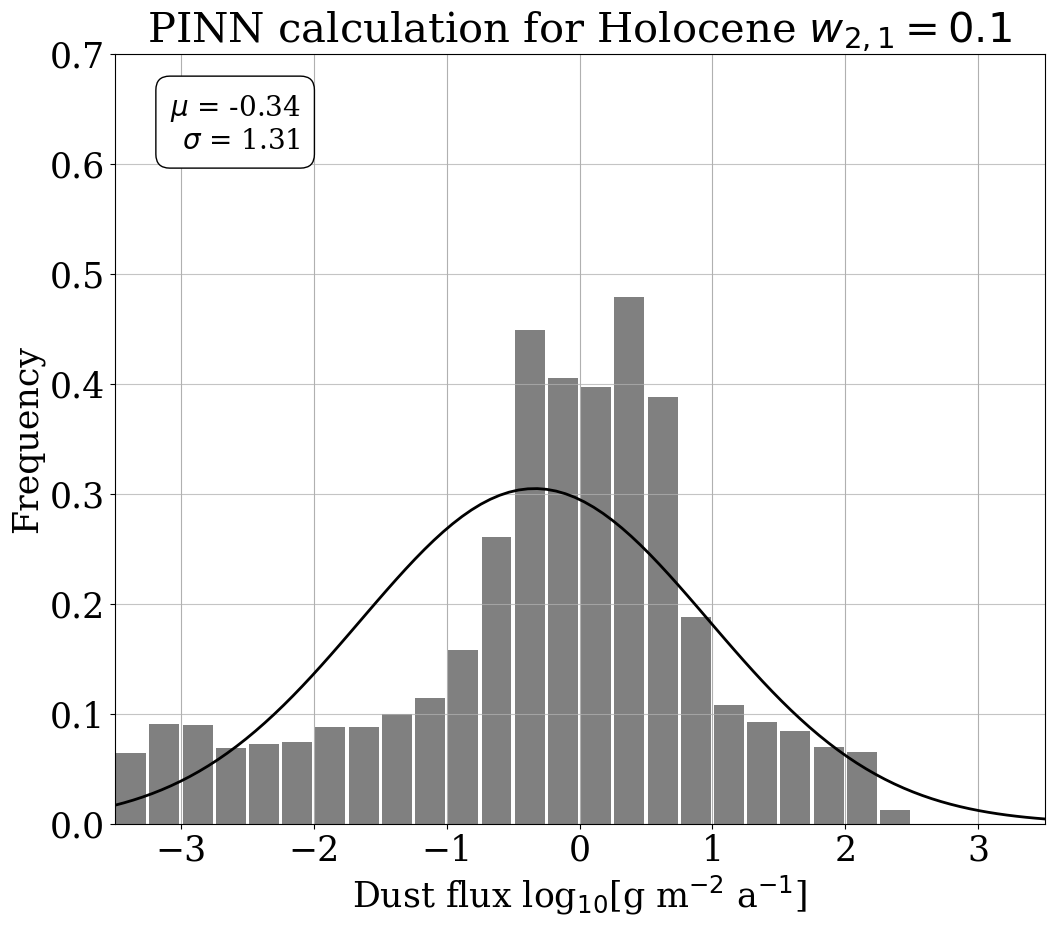

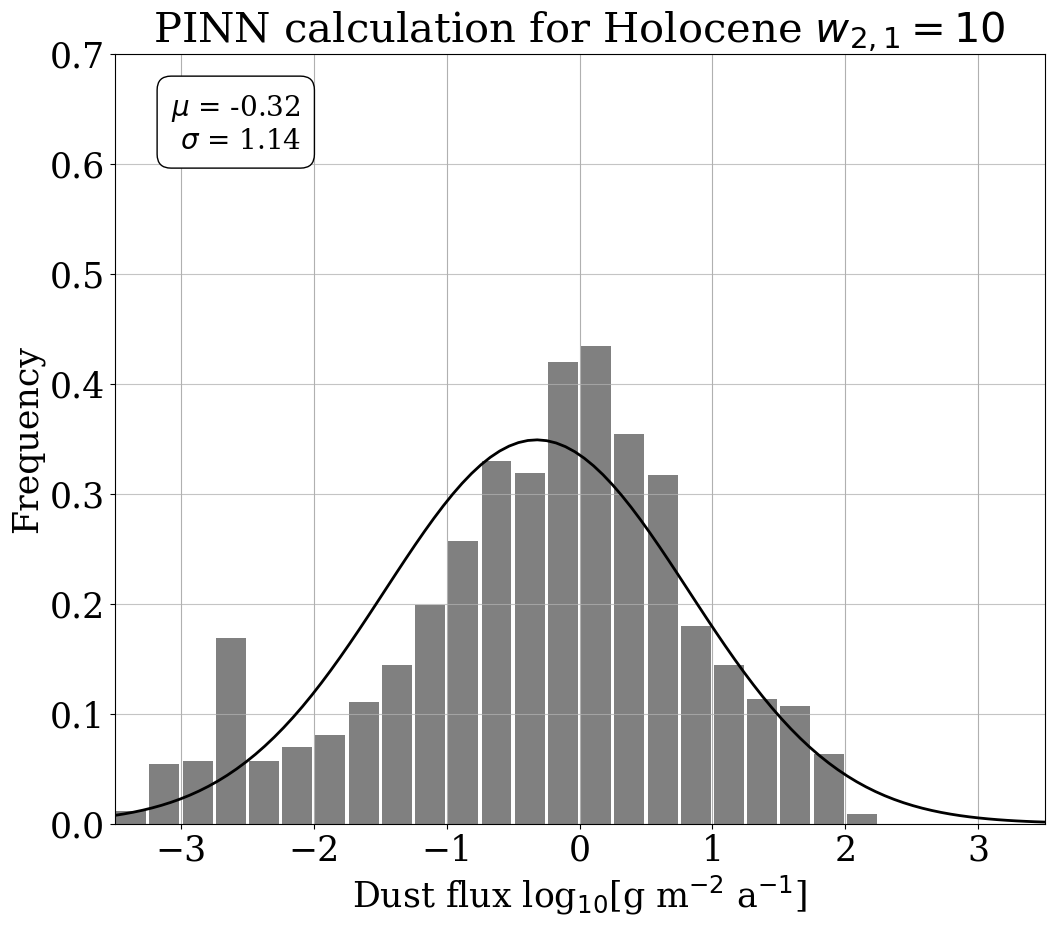

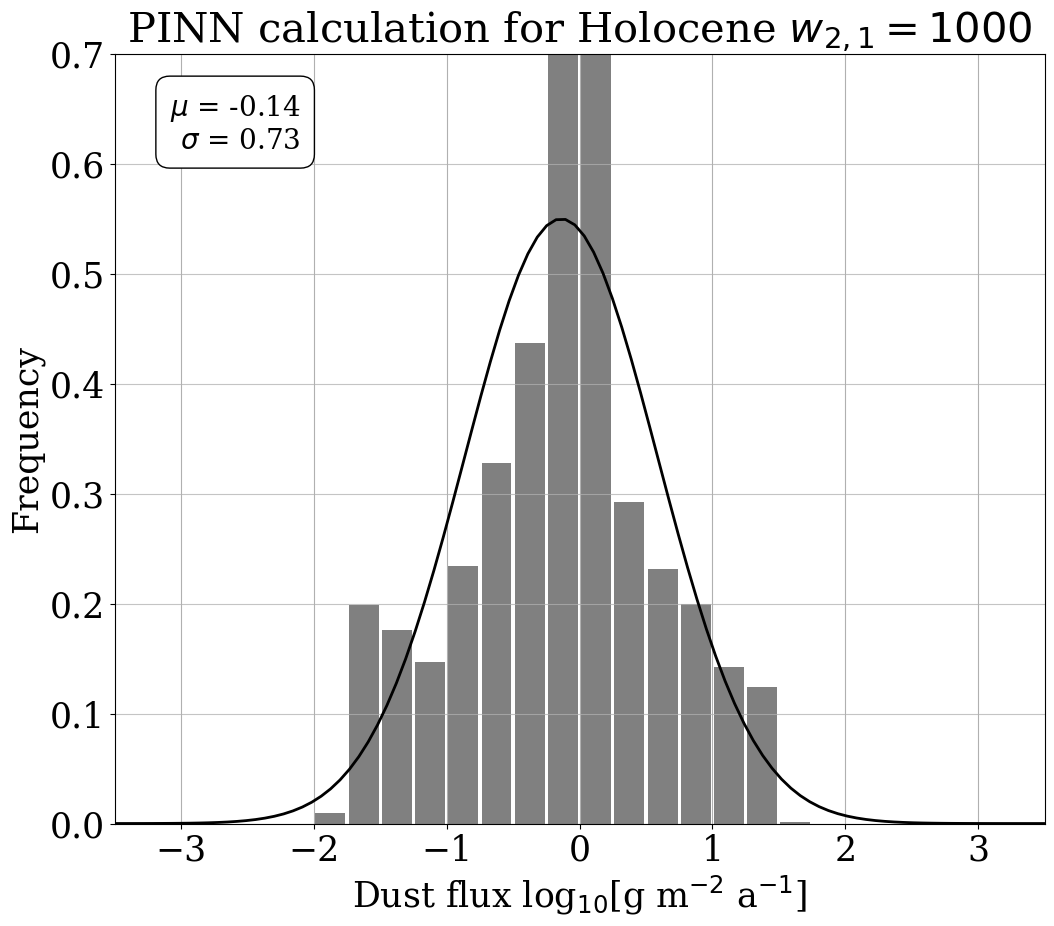

In [45]:
for i, results in enumerate(dfs_pinn_results_Holocene):
    weight = df_weights['label'][i]
    plot_hist(
        results,
        title=f'PINN calculation for Holocene $w_{{2,1}} = {weight}$',
        name_to_save="PINN_SENSITIVITY_HIST_HOLOCENE_"+str(i),
        figure_save_path=FIGURE_PATH,
    )

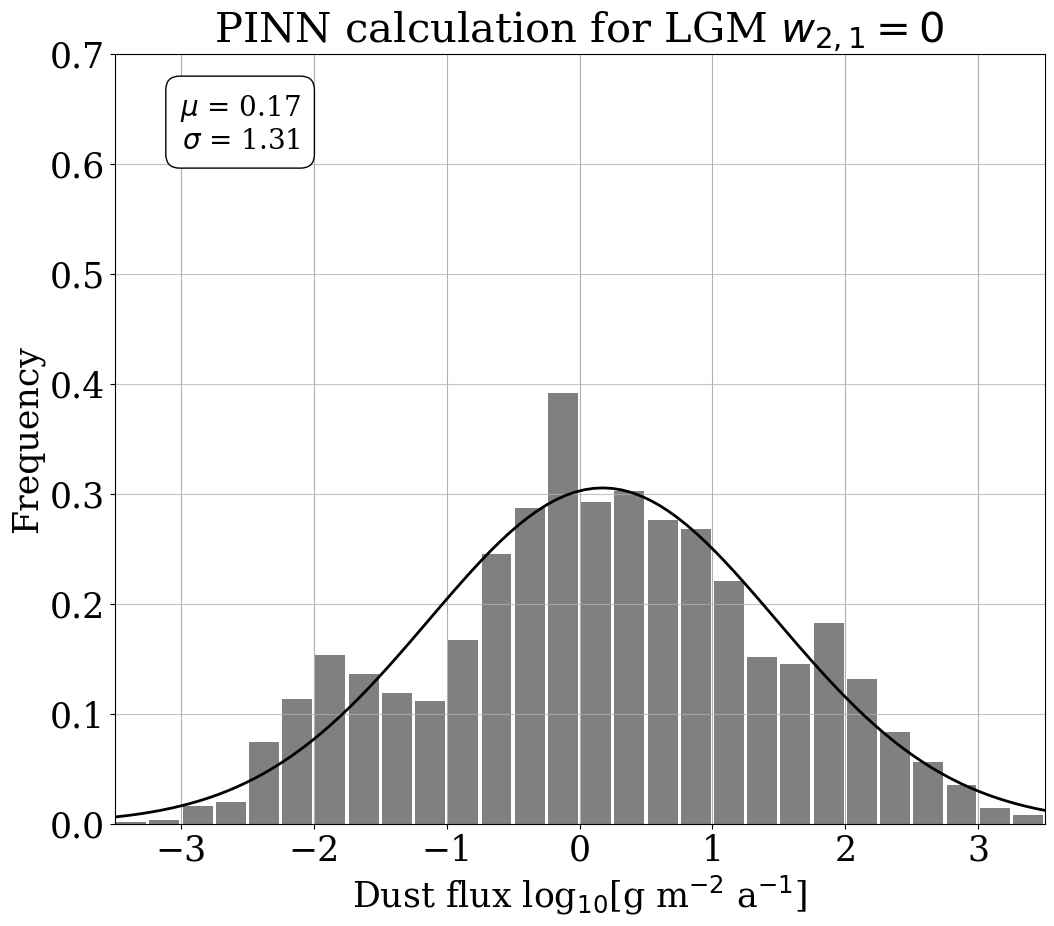

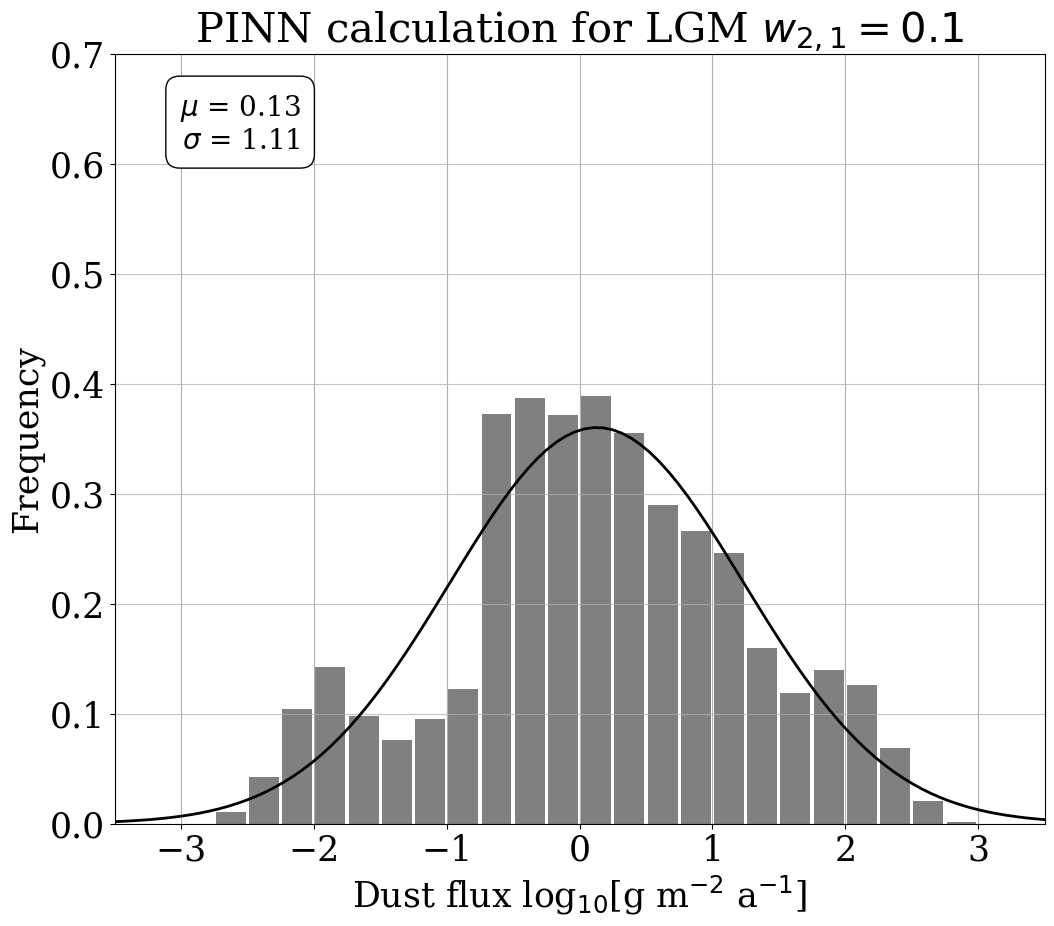

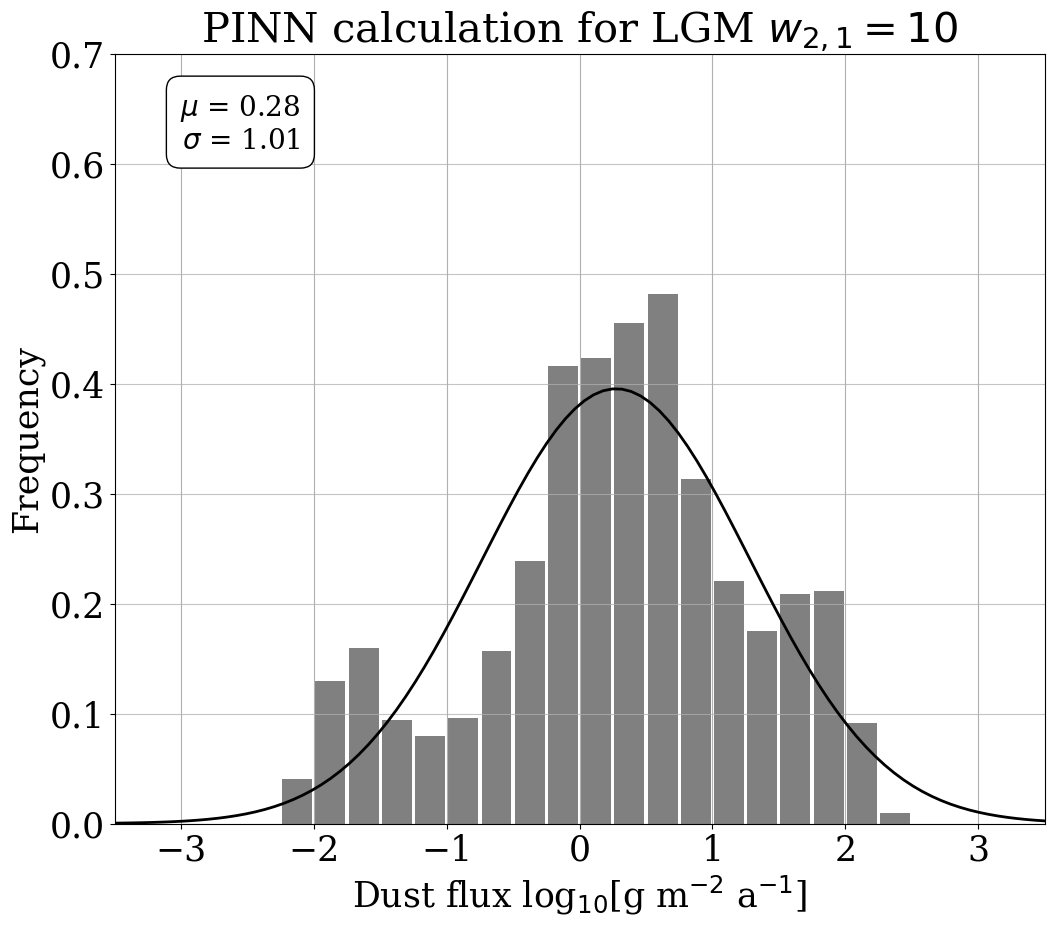

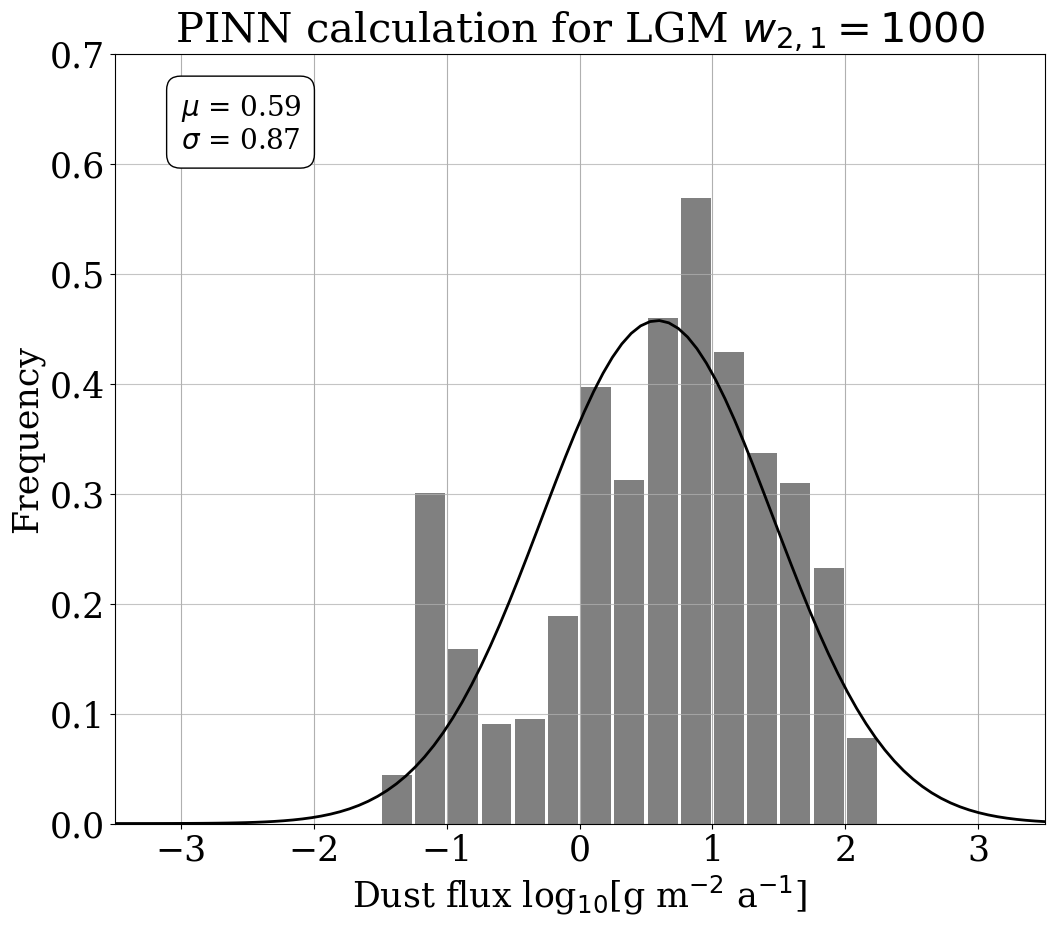

In [46]:
for i, results in enumerate(dfs_pinn_results_LGM):
    weight = df_weights['label'][i]
    plot_hist(
        results,
        title=f'PINN calculation for LGM $w_{{2,1}} = {weight}$',
        name_to_save="PINN_SENSITIVITY_HIST_LGM_"+str(i),
        figure_save_path=FIGURE_PATH,
    )